In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd 


In [140]:
def exp(x,a,b,c):
    return np.exp(-x/b)*a+c
def frontselect(lista, fronte=0):
    result = []
    for i in lista:
        if i[2]==fronte:
            result.append(i)
    return result

In [141]:
df = pd.DataFrame(columns= ["Canale 0","Canale 3","Canale 4","Canale 6","Canale 8" ])
fname = "13_06 00.35.txt"
file = open(fname, "r")
n = 0
q = 0
col = 0
car = 0
locdict = {}
events = []
for f in file: 
    #print(f)
    #print(df)
    if q ==4:#parte di programma che mette il dizionario nella lista
        k = locdict.keys()
        for h in k:
            lista = locdict[h]
            lista_int= [int(y) for y in lista]
            events.append(lista_int)
        #for nr in k: ci ho un po' provato a mettere nel dataframe, senza successo. Per ora ci basta pensare alla lista
            
           # try:
           #     print("GOING")
           #     print(locdict[nr])
           #     print(df)
           #     df.loc[len(df), "event"+str(nr)] = locdict[nr]
           # except KeyError:
           #     print("AIUTO")
           #     cose = [np.nan for i in range(len(df.index))]
           #     toadd = cose+locdict[nr]
           #     title = "event "+str(nr)
           #     df[title] = toadd
                
        locdict = {}
        q = 0
        col =0
    for i in range(len(f)):
        #print(locdict)
        #print("f_i="+str(f[i]))
        #print("col="+str(col))
        #print("car="+str(car))
        #print("q"+str(q))
        if f[i] == "\n":
            q+=1
            col = 0
            car = 0            
            n+=1
            break
        elif f[i] == "\t":
            col += 1
            car =0 
        else:
            if car ==0 and q == 0:
                locdict[col]=[f[i]]
                car= 1
            elif car ==0:
                locdict[col].append(f[i])
                car +=1
            else:
                #print(locdict)
                locdict[col][q]+=f[i]
                car+=1
                
                
            

file.close()


In [142]:

dict_tot= {}
for ev in events:
    if ev[1] not in dict_tot.keys():
        dict_tot[ev[1]]= [ev]
    else:
        dict_tot[ev[1]].append(ev)

In [143]:
events

[[0, 0, 1, 165],
 [0, 3, 1, 7],
 [1, 0, 1, 164],
 [1, 0, 0, 4464],
 [1, 0, 1, 4862],
 [1, 3, 1, 7],
 [2, 0, 1, 163],
 [2, 3, 1, 7],
 [3, 0, 1, 164],
 [3, 3, 1, 7],
 [4, 0, 1, 158],
 [4, 0, 0, 179],
 [4, 0, 1, 534],
 [4, 3, 1, 6],
 [5, 0, 1, 159],
 [5, 3, 1, 7],
 [6, 0, 1, 167],
 [6, 3, 1, 6],
 [7, 0, 1, 164],
 [7, 3, 1, 6],
 [8, 0, 1, 163],
 [8, 3, 1, 7],
 [9, 0, 1, 158],
 [9, 3, 1, 7],
 [10, 0, 1, 159],
 [10, 3, 1, 6],
 [11, 0, 1, 160],
 [11, 3, 1, 6],
 [12, 0, 1, 159],
 [12, 3, 1, 6],
 [13, 0, 1, 164],
 [13, 3, 1, 7],
 [14, 0, 1, 164],
 [14, 3, 1, 6],
 [15, 0, 1, 380],
 [15, 3, 1, 7],
 [16, 0, 1, 162],
 [16, 3, 1, 7],
 [17, 0, 1, 161],
 [17, 3, 1, 6],
 [18, 0, 1, 163],
 [18, 3, 1, 6],
 [19, 0, 1, 165],
 [19, 3, 1, 8],
 [20, 0, 1, 164],
 [20, 3, 1, 6],
 [21, 0, 1, 164],
 [21, 3, 1, 7],
 [22, 0, 1, 158],
 [22, 3, 1, 7],
 [23, 0, 1, 164],
 [23, 3, 1, 6],
 [24, 0, 1, 163],
 [24, 3, 1, 7],
 [25, 0, 1, 164],
 [25, 3, 1, 6],
 [26, 0, 1, 171],
 [26, 0, 0, 4729],
 [26, 0, 1, 5130],
 [26, 3, 1

## Legenda per i vari canali
* 0 Up
* 3 CsI
* 4 Down
* 6 Coincidenza (110)
* 8 Coincidenza (01X)

## Scintillatore up

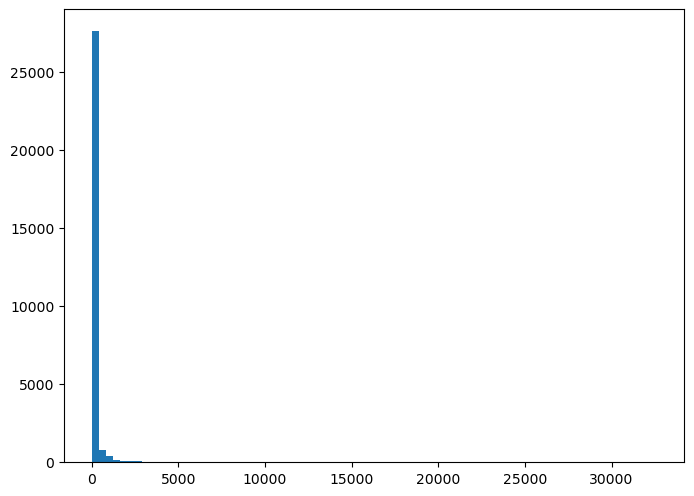

In [144]:
plt.figure(figsize=(8,6), dpi = 100)
yup,xup, oup = plt.hist([i[3] for i in dict_tot[0]], bins =80)


In [145]:
upsel = []
for i in dict_tot[0]:
    if i[3]<4000:
        upsel.append(i[3])

(array([7.0000e+00, 1.2000e+01, 2.6494e+04, 3.0600e+02, 4.3000e+01,
        3.0000e+01, 2.3400e+02, 4.4900e+02, 2.2700e+02, 1.6900e+02,
        1.1800e+02, 8.4000e+01, 4.9000e+01, 5.6000e+01, 4.7000e+01,
        4.7000e+01, 1.1400e+02, 9.9000e+01, 6.4000e+01, 4.8000e+01,
        3.5000e+01, 3.4000e+01, 2.6000e+01, 3.1000e+01, 1.9000e+01,
        2.5000e+01, 1.7000e+01, 1.5000e+01, 1.4000e+01, 1.1000e+01,
        1.8000e+01, 1.5000e+01, 2.5000e+01, 1.4000e+01, 7.0000e+00,
        1.1000e+01, 1.2000e+01, 7.0000e+00, 1.5000e+01, 9.0000e+00,
        1.2000e+01, 1.1000e+01, 9.0000e+00, 6.0000e+00, 1.4000e+01,
        6.0000e+00, 7.0000e+00, 9.0000e+00, 7.0000e+00, 6.0000e+00,
        9.0000e+00, 6.0000e+00, 4.0000e+00, 8.0000e+00, 8.0000e+00,
        2.0000e+00, 9.0000e+00, 5.0000e+00, 7.0000e+00, 6.0000e+00,
        5.0000e+00, 4.0000e+00, 6.0000e+00, 3.0000e+00, 4.0000e+00,
        2.0000e+00, 6.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00,
        6.0000e+00, 1.0000e+01, 8.0000e+00, 3.00

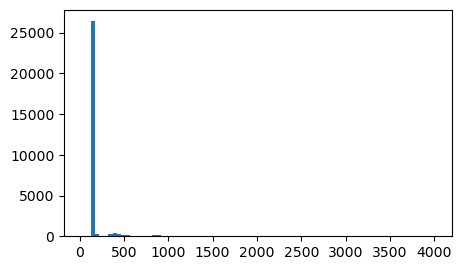

In [146]:
plt.figure(figsize=(5,3), dpi = 100)
plt.hist(upsel, bins = 80)

## Analisi CSI


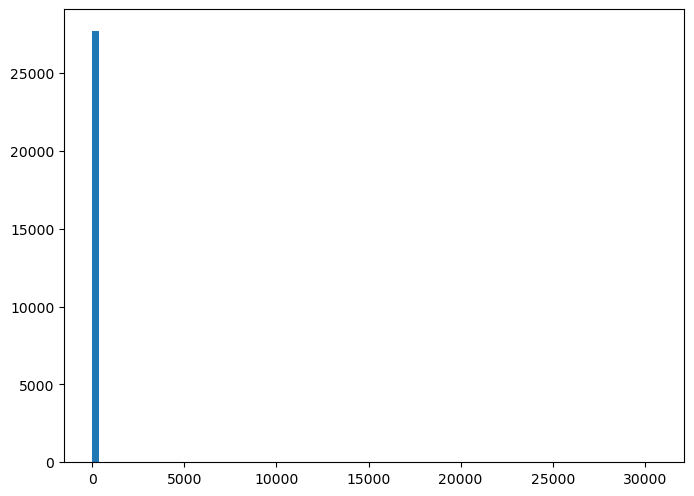

In [147]:
plt.figure(figsize=(8,6), dpi = 100)
ycsi,xcsi, ocsi = plt.hist([i[3] for i in dict_tot[3]], bins =80)


Adesso seleziono solo i csi sotto i 10, e vediamo quanto rappresentano del totale


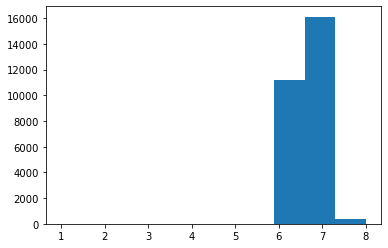

In [148]:
csi_selected = []
for i in dict_tot[3]:
    if i[3]<10:
        csi_selected.append(i[3])
csisy, csix, otcsh= plt.hist(csi_selected)

In [149]:
sum(csisy)/sum(ycsi)

0.9860581208771617

Insomma il 99% degli eventi è sotto i 10. 

## Down scint

In [150]:
fs_d = frontselect(dict_tot[4])
down_events = [i[3] for i in fs_d] 
len(fs_d)

1511

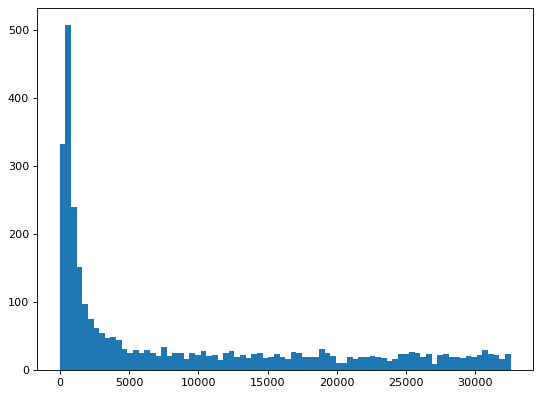

In [151]:
plt.figure(figsize=(8,6), dpi = 80)
ydw,xdw, odw = plt.hist([i[3] for i in dict_tot[4]], bins =80)


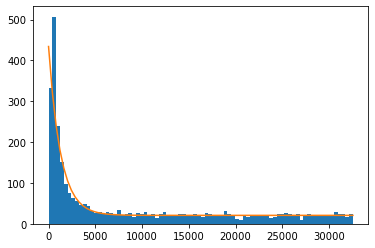

In [152]:
ydw,xdw, odw = plt.hist([i[3] for i in dict_tot[4]], bins =80)
paramsd, covd = curve_fit(f = exp,xdata = xdw[0:(len(xdw)-1)],ydata = ydw, p0 = (70,2000,0))
modeld = [exp(i, *paramsd) for i in xdw]
plt.plot(xdw, modeld)

In [153]:
paramsd

array([ 413.70212765, 1282.72787992,   20.6611082 ])

## Analisi delle coincidenze

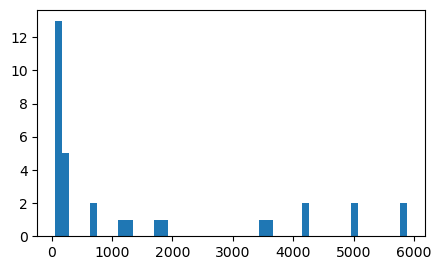

In [154]:

plt.figure(figsize=(5,3), dpi = 100)
coinc_100 = []
for i in dict_tot[6]:
    if i[2]==0:
       coinc_100.append 
y6,x6, o6 = plt.hist([i[3] for i in dict_tot[6]], bins = 50)
params6, cov6 = curve_fit(f = exp,xdata = x6[0:(len(x6)-1)],ydata = y6, p0 = (70,2000,0))


In [155]:
y6

array([13.,  5.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
        0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.])

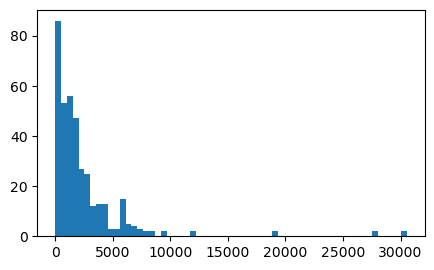

In [156]:
plt.figure(figsize=(5,3), dpi = 100)
ys, xs , other= plt.hist([i[3] for i in dict_tot[8]], bins = 60)
params, cov = curve_fit(f = exp,xdata = xs[0:(len(xs)-1)],ydata = ys, p0 = (70,2000,0))
model = [exp(i, *params) for i in xs]

### 01X


In [157]:
canale_8 =[]
for i in dict_tot[8]:
    if i[2] ==0:
        canale_8.append(i[3])

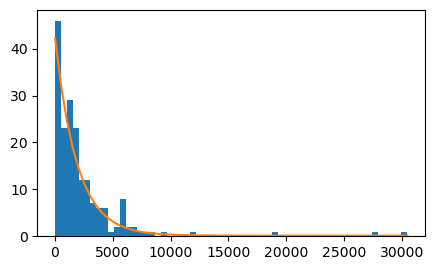

In [158]:
plt.figure(figsize=(5,3), dpi = 100)
ys, xs , other= plt.hist(canale_8, bins = 60)
params, cov = curve_fit(f = exp,xdata = xs[0:60],ydata = ys, p0 = (70,2000,0))
model = [exp(i, *params) for i in xs]

plt.plot(xs,model)

In [159]:
params

array([4.23248500e+01, 1.88834632e+03, 1.39525898e-01])

In [160]:
cov

array([[ 2.28401002e+00, -9.44921866e+01, -3.01176388e-02],
       [-9.44921866e+01,  1.35165533e+04, -1.20270649e+01],
       [-3.01176388e-02, -1.20270649e+01,  7.51243874e-02]])

In [163]:
coinc_01x =frontselect(dict_tot[8])
dw_s = frontselect(dict_tot[4])
nevents_down = [i[0] for i in dw_s]
coinc_010 =[]
coinc_011 = []
for i in coinc_01x:
    if i[0] in nevents_down:
        print(i[0])
        coinc_011.append(i)
    else:
        coinc_010.append(i)

2366
4593
5352
6333
9815
10015
12264
13457
17022
17650
18426
19514
21442
26583
26998
27246


In [164]:
dw_s 

[[32, 4, 0, 6612],
 [34, 4, 0, 29683],
 [52, 4, 0, 17865],
 [58, 4, 0, 1595],
 [69, 4, 0, 351],
 [69, 4, 0, 1218],
 [95, 4, 0, 22393],
 [143, 4, 0, 30256],
 [160, 4, 0, 22798],
 [174, 4, 0, 75],
 [183, 4, 0, 4379],
 [202, 4, 0, 224],
 [227, 4, 0, 28083],
 [229, 4, 0, 2889],
 [266, 4, 0, 412],
 [285, 4, 0, 3648],
 [319, 4, 0, 291],
 [380, 4, 0, 27121],
 [382, 4, 0, 3585],
 [410, 4, 0, 1545],
 [422, 4, 0, 17787],
 [426, 4, 0, 10840],
 [468, 4, 0, 15200],
 [492, 4, 0, 1517],
 [506, 4, 0, 956],
 [519, 4, 0, 16391],
 [537, 4, 0, 17409],
 [544, 4, 0, 6324],
 [571, 4, 0, 4026],
 [591, 4, 0, 7499],
 [595, 4, 0, 26257],
 [627, 4, 0, 5579],
 [628, 4, 0, 2593],
 [629, 4, 0, 12532],
 [635, 4, 0, 2672],
 [648, 4, 0, 11973],
 [649, 4, 0, 18128],
 [650, 4, 0, 31810],
 [671, 4, 0, 13290],
 [681, 4, 0, 561],
 [693, 4, 0, 17375],
 [730, 4, 0, 32254],
 [757, 4, 0, 1390],
 [781, 4, 0, 389],
 [790, 4, 0, 5725],
 [793, 4, 0, 31528],
 [801, 4, 0, 5037],
 [820, 4, 0, 1252],
 [827, 4, 0, 591],
 [838, 4, 0, 109

(array([11.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([  177. ,  3207.4,  6237.8,  9268.2, 12298.6, 15329. , 18359.4,
        21389.8, 24420.2, 27450.6, 30481. ]),
 <BarContainer object of 10 artists>)

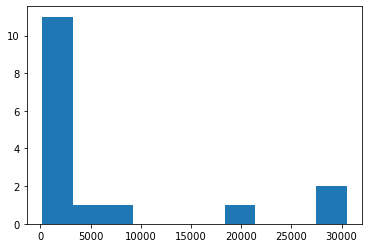

In [166]:
plt.hist([i[3] for  i in coinc_011])